In [116]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

In [8]:
reddit_data = pd.read_csv("/Users/soumyadeepray/Documents/Research Project- Nutrition Sciences/Reddit_Science_Parenting/data/Reddit_ScienceParenting_ForAnalysis_2022.09.02.csv")

In [9]:
reddit_data.head(5)

,id,title,content,date,parent,url,links url,number_of_upvotes,number_of_replies,StudyID
0,0_88469_126_t1_h8zyf5g,I need actual numbers and problems that can oc...,I don't have any studies to share but if you h...,2021-08-15 00:13:31,0_88469_126_t3_p4mbnp,https://www.reddit.com/r/ScienceBasedParenting...,NaN,0,0,1
1,0_88469_126_t1_h8zztfs,I need actual numbers and problems that can oc...,"To piggyback on this, it may also be easier to...",2021-08-15 00:29:07,0_88469_126_t3_p4mbnp,https://www.reddit.com/r/ScienceBasedParenting...,NaN,0,0,2
2,0_88469_126_t3_p4op8d,Best age for learning a second language?,Does anyone know of research on this? We reall...,2021-08-15 01:54:03,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,26,13,3
3,0_88469_126_t1_h90calb,Best age for learning a second language?,Best age to start is 0 months. ~~By 10 months ...,2021-08-15 03:10:48,0_88469_126_t3_p4op8d,https://www.reddit.com/r/ScienceBasedParenting...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,0,0,4
4,0_88469_126_t1_h90tu70,Impact of the COVID-19 Pandemic on Early Child...,My son is 2 and has no issues whatsoever. Mayb...,2021-08-15 07:13:42,0_88469_126_t3_p3zzag,https://www.reddit.com/r/ScienceBasedParenting...,NaN,0,0,5


In [13]:
reddit_data.columns

Index(['id', 'title', 'content', 'date', 'parent', 'url', 'links url',
       'number_of_upvotes', 'number_of_replies', 'StudyID', 'title_content'],
      dtype='object')

In [10]:
reddit_data = reddit_data[reddit_data['parent']=="0"]

,id,title,content,date,parent,url,links url,number_of_upvotes,number_of_replies,StudyID
2,0_88469_126_t3_p4op8d,Best age for learning a second language?,Does anyone know of research on this? We reall...,2021-08-15 01:54:03,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,26,13,3
39,0_88469_126_t3_p5f4ea,Zofran while pregnant?,What's the evidence based data on Zofran risks...,2021-08-16 07:31:39,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,31,44,30
51,0_88469_126_t3_p5maej,17-year study of children associates poverty w...,NaN,2021-08-16 13:43:19,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,10,0,40
52,0_88469_126_t3_p5mb60,"Just 10% of kids with ADHD outgrow it, study f...",NaN,2021-08-16 13:44:27,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,24,0,40
53,0_88469_126_t3_p5mcxo,Study shows differences in rapidly processing ...,NaN,2021-08-16 13:46:59,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,4,0,40


In [11]:
reddit_data.shape

(711, 10)

Replacing the null values in 'content' column with space

In [17]:
reddit_data['content'] = reddit_data['content'].fillna(' ')

In [19]:
reddit_data['title_content'] = reddit_data['title'] + reddit_data['content']

Punctuation Removal

In [22]:
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree= "".join([i if i not in string.punctuation else ' ' for i in text])
    return punctuationfree
#storing the puntuation free text
reddit_data['clean_title_content'] = reddit_data['title_content'].apply(lambda x:remove_punctuation(x))
reddit_data.head(5)

,id,title,content,date,parent,url,links url,number_of_upvotes,number_of_replies,StudyID,title_content,clean_title_content
2,0_88469_126_t3_p4op8d,Best age for learning a second language?,Does anyone know of research on this? We reall...,2021-08-15 01:54:03,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,26,13,3,Best age for learning a second language?Does a...,Best age for learning a second language Does a...
39,0_88469_126_t3_p5f4ea,Zofran while pregnant?,What's the evidence based data on Zofran risks...,2021-08-16 07:31:39,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,31,44,30,Zofran while pregnant?What's the evidence base...,Zofran while pregnant What s the evidence base...
51,0_88469_126_t3_p5maej,17-year study of children associates poverty w...,,2021-08-16 13:43:19,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,10,0,40,17-year study of children associates poverty w...,17 year study of children associates poverty w...
52,0_88469_126_t3_p5mb60,"Just 10% of kids with ADHD outgrow it, study f...",,2021-08-16 13:44:27,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,24,0,40,"Just 10% of kids with ADHD outgrow it, study f...",Just 10 of kids with ADHD outgrow it study f...
53,0_88469_126_t3_p5mcxo,Study shows differences in rapidly processing ...,,2021-08-16 13:46:59,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,4,0,40,Study shows differences in rapidly processing ...,Study shows differences in rapidly processing ...


Lowering the text

In [38]:
reddit_data['clean_title_content_lower']= reddit_data['clean_title_content'].apply(lambda x: x.lower())

Tokenization

The text is split into smaller units. We can use either sentence tokenization or word tokenization based on our problem statement.

In [28]:
from nltk import word_tokenize

In [39]:
reddit_data['clean_title_content_tokenized'] = reddit_data['clean_title_content_lower'].apply(lambda x: word_tokenize(x))
reddit_data.head(3)

,id,title,content,date,parent,url,links url,number_of_upvotes,number_of_replies,StudyID,title_content,clean_title_content,clean_title_content_tokenized,clean_title_content_noStopWords,clean_title_content_lower
2,0_88469_126_t3_p4op8d,Best age for learning a second language?,Does anyone know of research on this? We reall...,2021-08-15 01:54:03,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,26,13,3,Best age for learning a second language?Does a...,Best age for learning a second language Does a...,"[best, age, for, learning, a, second, language...","[Best, age, learning, second, language, Does, ...",best age for learning a second language does a...
39,0_88469_126_t3_p5f4ea,Zofran while pregnant?,What's the evidence based data on Zofran risks...,2021-08-16 07:31:39,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,31,44,30,Zofran while pregnant?What's the evidence base...,Zofran while pregnant What s the evidence base...,"[zofran, while, pregnant, what, s, the, eviden...","[Zofran, pregnant, What, evidence, based, data...",zofran while pregnant what s the evidence base...
51,0_88469_126_t3_p5maej,17-year study of children associates poverty w...,,2021-08-16 13:43:19,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,10,0,40,17-year study of children associates poverty w...,17 year study of children associates poverty w...,"[17, year, study, of, children, associates, po...","[17, year, study, children, associates, povert...",17 year study of children associates poverty w...


Stop word removal

Stopwords are the commonly used words and are removed from the text as they do not add any value to the analysis. These words carry less or no meaning.

In [31]:
import nltk
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [33]:
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

In [42]:
reddit_data['clean_title_content_noSW'] = reddit_data['clean_title_content_tokenized'].apply(lambda x: remove_stopwords(x))
reddit_data.head(3)

,id,title,content,date,parent,url,links url,number_of_upvotes,number_of_replies,StudyID,title_content,clean_title_content,clean_title_content_tokenized,clean_title_content_noStopWords,clean_title_content_lower,clean_title_content_noSW
2,0_88469_126_t3_p4op8d,Best age for learning a second language?,Does anyone know of research on this? We reall...,2021-08-15 01:54:03,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,26,13,3,Best age for learning a second language?Does a...,Best age for learning a second language Does a...,"[best, age, for, learning, a, second, language...","[best, age, learning, second, language, anyone...",best age for learning a second language does a...,"[best, age, learning, second, language, anyone..."
39,0_88469_126_t3_p5f4ea,Zofran while pregnant?,What's the evidence based data on Zofran risks...,2021-08-16 07:31:39,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,31,44,30,Zofran while pregnant?What's the evidence base...,Zofran while pregnant What s the evidence base...,"[zofran, while, pregnant, what, s, the, eviden...","[zofran, pregnant, evidence, based, data, zofr...",zofran while pregnant what s the evidence base...,"[zofran, pregnant, evidence, based, data, zofr..."
51,0_88469_126_t3_p5maej,17-year study of children associates poverty w...,,2021-08-16 13:43:19,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,10,0,40,17-year study of children associates poverty w...,17 year study of children associates poverty w...,"[17, year, study, of, children, associates, po...","[17, year, study, children, associates, povert...",17 year study of children associates poverty w...,"[17, year, study, children, associates, povert..."


Stemming

It is also known as the text standardization step where the words are stemmed or diminished to their root/base form.

In [41]:
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()

In [43]:
#defining a function for stemming
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text
reddit_data['clean_title_content_noSW_stemmed']=reddit_data['clean_title_content_noSW'].apply(lambda x: stemming(x))

Lemmatization

It stems the word but makes sure that it does not lose its meaning.  Lemmatization has a pre-defined dictionary that stores the context of words and checks the word in the dictionary while diminishing.

In [44]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

In [48]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/soumyadeepray/nltk_data...


True

In [49]:
#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
reddit_data['clean_title_content_lemmatized']=reddit_data['clean_title_content_noSW_stemmed'].apply(lambda x:lemmatizer(x))

In [50]:
reddit_data.head(5)

,id,title,content,date,parent,url,links url,number_of_upvotes,number_of_replies,StudyID,title_content,clean_title_content,clean_title_content_tokenized,clean_title_content_noStopWords,clean_title_content_lower,clean_title_content_noSW,clean_title_content_noSW_stemmed,clean_title_content_lemmatized
2,0_88469_126_t3_p4op8d,Best age for learning a second language?,Does anyone know of research on this? We reall...,2021-08-15 01:54:03,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,26,13,3,Best age for learning a second language?Does a...,Best age for learning a second language Does a...,"[best, age, for, learning, a, second, language...","[best, age, learning, second, language, anyone...",best age for learning a second language does a...,"[best, age, learning, second, language, anyone...","[best, age, learn, second, languag, anyon, kno...","[best, age, learn, second, languag, anyon, kno..."
39,0_88469_126_t3_p5f4ea,Zofran while pregnant?,What's the evidence based data on Zofran risks...,2021-08-16 07:31:39,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,31,44,30,Zofran while pregnant?What's the evidence base...,Zofran while pregnant What s the evidence base...,"[zofran, while, pregnant, what, s, the, eviden...","[zofran, pregnant, evidence, based, data, zofr...",zofran while pregnant what s the evidence base...,"[zofran, pregnant, evidence, based, data, zofr...","[zofran, pregnant, evid, base, data, zofran, r...","[zofran, pregnant, evid, base, data, zofran, r..."
51,0_88469_126_t3_p5maej,17-year study of children associates poverty w...,,2021-08-16 13:43:19,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,10,0,40,17-year study of children associates poverty w...,17 year study of children associates poverty w...,"[17, year, study, of, children, associates, po...","[17, year, study, children, associates, povert...",17 year study of children associates poverty w...,"[17, year, study, children, associates, povert...","[17, year, studi, children, associ, poverti, s...","[17, year, studi, child, associ, poverti, smal..."
52,0_88469_126_t3_p5mb60,"Just 10% of kids with ADHD outgrow it, study f...",,2021-08-16 13:44:27,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,24,0,40,"Just 10% of kids with ADHD outgrow it, study f...",Just 10 of kids with ADHD outgrow it study f...,"[just, 10, of, kids, with, adhd, outgrow, it, ...","[10, kids, adhd, outgrow, study, finds]",just 10 of kids with adhd outgrow it study f...,"[10, kids, adhd, outgrow, study, finds]","[10, kid, adhd, outgrow, studi, find]","[10, kid, adhd, outgrow, studi, find]"
53,0_88469_126_t3_p5mcxo,Study shows differences in rapidly processing ...,,2021-08-16 13:46:59,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,4,0,40,Study shows differences in rapidly processing ...,Study shows differences in rapidly processing ...,"[study, shows, differences, in, rapidly, proce...","[study, shows, differences, rapidly, processin...",study shows differences in rapidly processing ...,"[study, shows, differences, rapidly, processin...","[studi, show, differ, rapidli, process, sensor...","[studi, show, differ, rapidli, process, sensor..."


WordCloud Generation

In [85]:
from wordcloud import WordCloud
def wordcloud(x, color):
    plt.figure(figsize=(14, 10))
    wordcloud = WordCloud(width = 1000, height = 500,background_color = color).generate(" ".join(x))
    plt.imshow(wordcloud)
    plt.axis("off")
    return wordcloud

Building WordCloud after Stemming and Lemmatization

In [88]:
words_list = []
for i in reddit_data['clean_title_content_lemmatized']:
    for word in i:
        words_list.append(word)

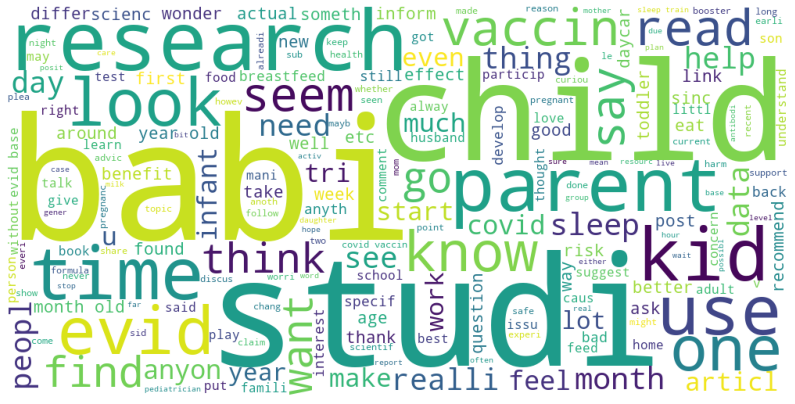

In [92]:
words = ' '.join(words_list)
all_words = words.split()
wordcloud(all_words, 'white')

Building WordCloud before Stemming and Lemmatization

In [95]:
words_list_1 = []
for i in reddit_data['clean_title_content_noSW']:
    for word in i:
        words_list_1.append(word)

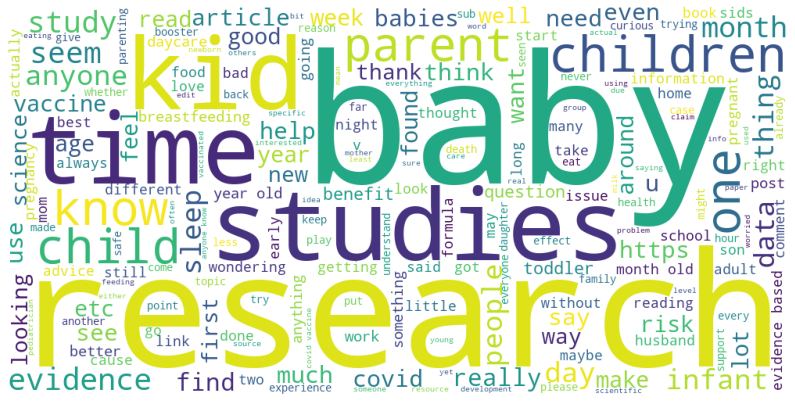

In [96]:
words_1 = ' '.join(words_list_1)
all_words_1 = words_1.split()
wordcloud(all_words_1, 'white')

Generating n-grams

In [98]:
#method to generate n-grams:
#params:
#text-the text for which we have to generate n-grams
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)

def generate_N_grams(text,ngram=1):
    words=[word for word in text.split(" ")]  
    temp=zip(*[words[i:] for i in range(0,ngram)])
    ans=[' '.join(ngram) for ngram in temp]
    return ans

In [112]:
word_count = defaultdict(int)
for word in generate_N_grams(words_1,2):
    word_count[word] += 1

In [113]:
df_word_count = pd.DataFrame(sorted(word_count.items(),key=lambda x:x[1],reverse=True))

In [114]:
word=df_word_count[0][:10]
count=df_word_count[1][:10]

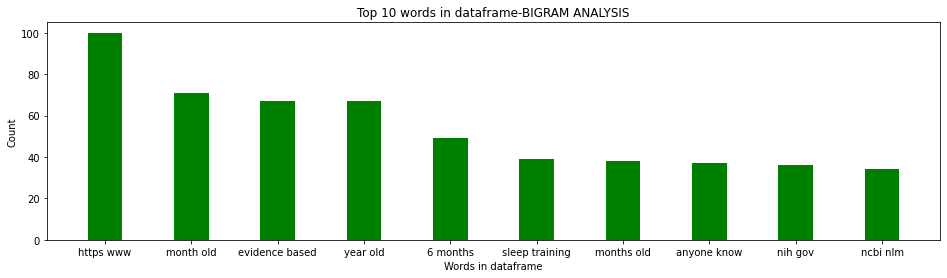

In [115]:
plt.figure(1,figsize=(16,4))
plt.bar(word,count, color ='green',
        width = 0.4)
plt.xlabel("Words in dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in dataframe-BIGRAM ANALYSIS")
plt.savefig("bigram_analysis.png")
plt.show()